In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('titanic_train.csv', index_col="PassengerId")

In [3]:
data.shape

(891, 11)

In [4]:
data.isnull().sum().sort_values(ascending=False)

Cabin       687
Age         177
Embarked      2
Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Fare          0
dtype: int64

In [5]:
data.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
539,0,3,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S
734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
104,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S
232,0,3,"Larsson, Mr. Bengt Edvin",male,29.0,0,0,347067,7.7750,NaN,S
338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.5000,E40,C
227,1,2,"Mellors, Mr. William John",male,19.0,0,0,SW/PP 751,10.5000,NaN,S
292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,11967,91.0792,B49,C


In [6]:
#drop columns we dont use 
data.drop(["Name","Ticket","Cabin"], axis=1, inplace=True)


In [7]:
data.isnull().sum().sort_values(ascending=False)

Age         177
Embarked      2
Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
dtype: int64

In [8]:
data.groupby(by="Pclass", dropna=True)['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

<AxesSubplot:ylabel='PassengerId'>

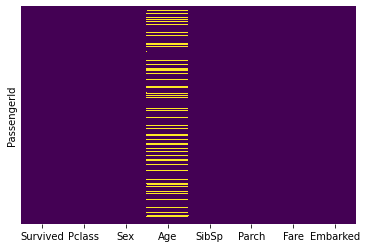

In [9]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age


data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

In [11]:
data.dropna(inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


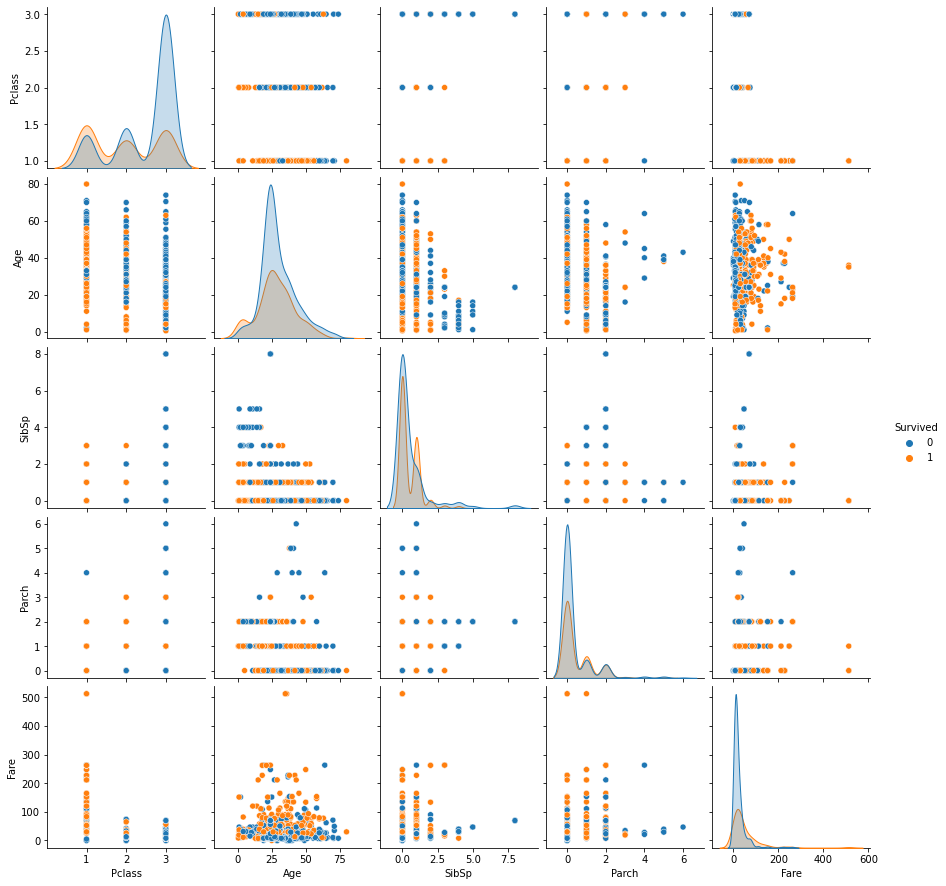

In [13]:
sns.pairplot(data, hue='Survived')

In [14]:
data.corr().T

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.052051,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.405549,0.081656,0.016824,-0.548193
Age,-0.052051,-0.405549,1.000000,-0.242807,-0.170089,0.120938
SibSp,-0.034040,0.081656,-0.242807,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.170089,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.120938,0.160887,0.217532,1.000000


In [15]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)

In [16]:
data = pd.concat([data,sex,embark],axis=1)

In [17]:
data.drop(['Sex','Embarked'],axis=1,inplace=True)
data.sample(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,,
227,1,2,19.0,0,0,10.5000,1,0,1
34,0,2,66.0,0,0,10.5000,1,0,1
31,0,1,40.0,0,0,27.7208,1,0,0
625,0,3,21.0,0,0,16.1000,1,0,1
581,1,2,25.0,1,1,30.0000,0,0,1
21,0,2,35.0,0,0,26.0000,1,0,1
704,0,3,25.0,0,0,7.7417,1,1,0
171,0,1,61.0,0,0,33.5000,1,0,1
617,0,3,34.0,1,1,14.4000,1,0,1


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1), 
                                                    data['Survived'], test_size=0.30, 
                                                    random_state=101)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/varathm/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
predictions = logmodel.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [24]:
print(confusion_matrix(y_test,predictions))

[[147  16]
 [ 30  74]]


In [25]:
pow(10,5)

100000

In [26]:
100000-100/100000


99999.999